classes to predict:  ['setosa' 'versicolor' 'virginica']
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


(150, 4)

(150,)

Accuracy on train data using Gini:  1.0
Accuracy on test data using Gini:  0.9473684210526315
Accuracy on train data using entropy 1.0
Accuracy on test data using entropy 0.9473684210526315
Accuracy on train data using entropy 0.9642857142857143
Accuracy on test data using entropy 0.9473684210526315


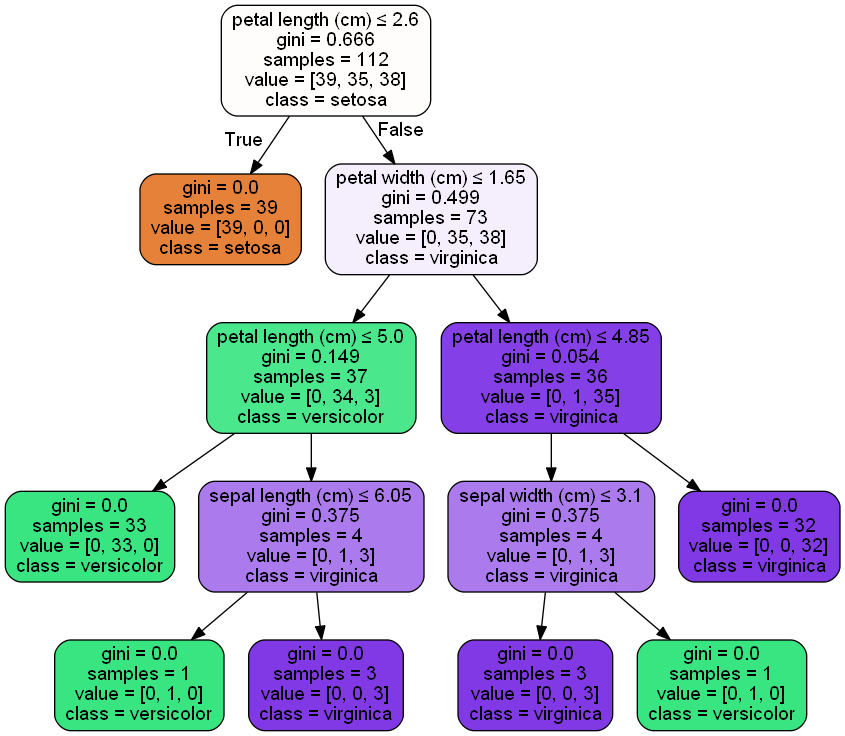

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

#load iris data
data = load_iris()
print('classes to predict: ',data.target_names)
print('Features: ',data.feature_names)
X = data.data
y = data.target

display (X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 50, test_size = 0.25)
#default criterion is Gini
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy on train data using Gini: ',accuracy_score(y_true = y_train, y_pred = classifier.predict(X_train)))
print('Accuracy on test data using Gini: ',accuracy_score(y_true = y_test, y_pred = y_pred))
#change criterion to entropy
classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train, y_train)
y_pred_entropy = classifier_entropy.predict(X_test)
print('Accuracy on train data using entropy', accuracy_score(y_true=y_train, y_pred = classifier_entropy.predict(X_train)))
print('Accuracy on test data using entropy', accuracy_score(y_true=y_test, y_pred = y_pred_entropy))
#change criterion to entropy with min_samples_split to 50. Default value is 2
classifier_entropy1 = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
classifier_entropy1.fit(X_train, y_train)
y_pred_entropy1 = classifier_entropy1.predict(X_test)
print('Accuracy on train data using entropy', accuracy_score(y_true=y_train, y_pred = classifier_entropy1.predict(X_train)))
print('Accuracy on test data using entropy', accuracy_score(y_true=y_test, y_pred = y_pred_entropy1))
#visualise the decision tree

#visualize
from sklearn.tree import export_graphviz #for visualization
from six import StringIO  #keep drawings
from IPython.display import Image #IPython interactive shell
import pydotplus #interface to export lang
dot_data=StringIO()
export_graphviz(classifier,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=data.feature_names,class_names=data.target_names)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())